# Light Curves

This notebook takes the data you reduced in the "Pipeline" notebook, which are stored in the `outputs` directory and plots a light curve for the transient.

To run the notebook step-by step, click on the code cell below, and press `Shift-Enter` on your keyboard to run the cells in sequence. Plots will display in-line in the code, and will also be saved into the `plots` directory after you've finished.

If you're on Google Colab or haven't yet completed installation, you'll need to run the cell below

In [24]:
!pip install --upgrade --quiet pip setuptools wheel
!pip install --quiet -r ../requirements.txt

First we import the necessary libraries to make the photometric data more readable.

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

We can now read the data into a dataframe. You will need to enter the name of the file that contains the data you want to plot.

In [26]:
# Here we define the file that you want to plot
filename = "PSF_phot_1708682814.txt"  # @param {type:"string"}
# read data into dataframe
df = pd.read_table("../outputs/{}".format(filename))
# restrict to columns we need for plotting
df = df[["#image", "target", "filter", "mjd", "PSFmag", "err"]]
df = df.rename(columns={"#image": "image"})

df = df.sort_values("mjd")

df

,image,target,filter,mjd,PSFmag,err
0,tfn0m436-sq33-20240221-0126-e91.fits,SN2024bch,r,60361.89,14.13,0.08
1,tfn0m436-sq33-20240221-0127-e91.fits,SN2024bch,i,60361.89,14.30,0.11
2,tfn0m436-sq33-20240221-0125-e91.fits,SN2024bch,g,60361.89,14.35,0.08


The data has been presented as a dataframe - essentially a table. This contains information about the image file the photometry has been measured from - `image`, the name of the target as put into the LCO observing portal - `target`, the filter band the image was taken in - `filter`, the date of the observation in the modified julian date - `mjd`, the measured magnitude of the target - `PSFmag`, and the uncertainity on that magnitude - `err`.

We can now plot the lightcurve. You will need to enter the name of the transient here.

In [27]:
transient_name = "SN2024bch"  # @param {type:"string"}

In [28]:
# make a directory to save the plots in
import os

plot_dir = "../plots/{}".format(transient_name)
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

In [29]:
# define a colour palette
band_filt_dict = {
    "u": "steelblue",
    "g": "seagreen",
    "o": "orange",
    "c": "cyan",
    "r": "firebrick",
    "i": "saddlebrown",
    "z": "black",
    "B": "blue",
    "V": "green",
}

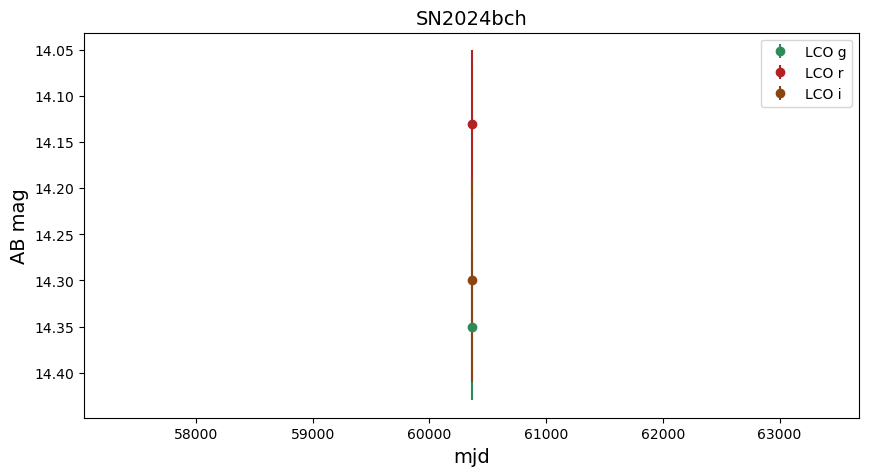

In [30]:
# initialise plot
fig = plt.figure(figsize=(10, 5))

# plot per filter
filters = ["u", "g", "r", "i", "z"]
for band in filters:
    df_filt = df[df["filter"] == band]
    if len(df_filt) > 0:
        plt.errorbar(
            x=df_filt["mjd"],
            y=df_filt["PSFmag"],
            yerr=df_filt["err"],
            fmt="o",
            label="LCO {}".format(band),
            color=band_filt_dict[band],
        )
        # plotting line - comment out to remove
        plt.plot(df_filt["mjd"], df_filt["PSFmag"], color=band_filt_dict[band])

# flip y-axis as magnitude measurements - i.e. lower number = brighter
plt.gca().invert_yaxis()

# legend and labels
plt.legend()
plt.xlabel("mjd", fontsize=14)
plt.ylabel("AB mag", fontsize=14)
plt.title("{}".format(transient_name), fontsize=14)

# saving plot as a pdf
plt.savefig("{}/{}_lightcurve.pdf".format(plot_dir, transient_name), dpi=400)